In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = df = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\Projects\dataset_olympics.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [33]:
df.shape

(70000, 15)

DATA PREPARATION AND CLEANING

In [34]:
# identify the columns containing null values

nan_values = df.isna()
nan_columns = nan_values.any()

columns_with_nan = df.columns[nan_columns].tolist()
print(columns_with_nan)


['Age', 'Height', 'Weight', 'Medal']


In [35]:

numeric_cols = ['Age', 'Height', 'Weight']


for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].fillna(0)


if 'Medal' in df.columns:
    df['Medal'] = df['Medal'].fillna('None')


if 'Age' in df.columns:
    df['Age'] = df['Age'].astype(int)



Exploratory Analysis and Visualization
Before we ask questions on the Olympic datasets, it would help to understand the participants ‘ demographics, i.e., country, age, gender etc.
It’s essential to explore these variables to understand how representative the participants is of the worldwide sports community.

In [36]:
import numpy as np
plt.figure(figsize=(12, 6))
# plt.title(df.Age)
plt.xlabel('Age')
plt.ylabel('Number of Participant')

plt.hist(df.Age, bins=np.arange(10,80,2), color='purple');


In [37]:

gender_counts = df.Sex.value_counts()
gender_counts


Sex
M    51877
F    18123
Name: count, dtype: int64

In [38]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

In [39]:
import pandas as pd

df.columns = df.columns.str.strip()


required_cols = ['Sex', 'Season', 'Year']
missing_cols = [col for col in required_cols if col not in df.columns]

if missing_cols:
    print(f"Missing columns: {missing_cols}")
else:
   
    female_participants = df[(df['Sex'] == 'F') & (df['Season'] == 'Summer')][['Sex', 'Year']]
    
   
    female_participants = female_participants.groupby('Year').count().reset_index()
  
    print(female_participants.head())


   Year  Sex
0  1900   13
1  1904    2
2  1906    2
3  1908   12
4  1912   34


C:\Users\user\AppData\Local\Temp\ipykernel_14300\2317931257.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=female_participants, x="Year", y="Sex", err_style="bars", ci=68)


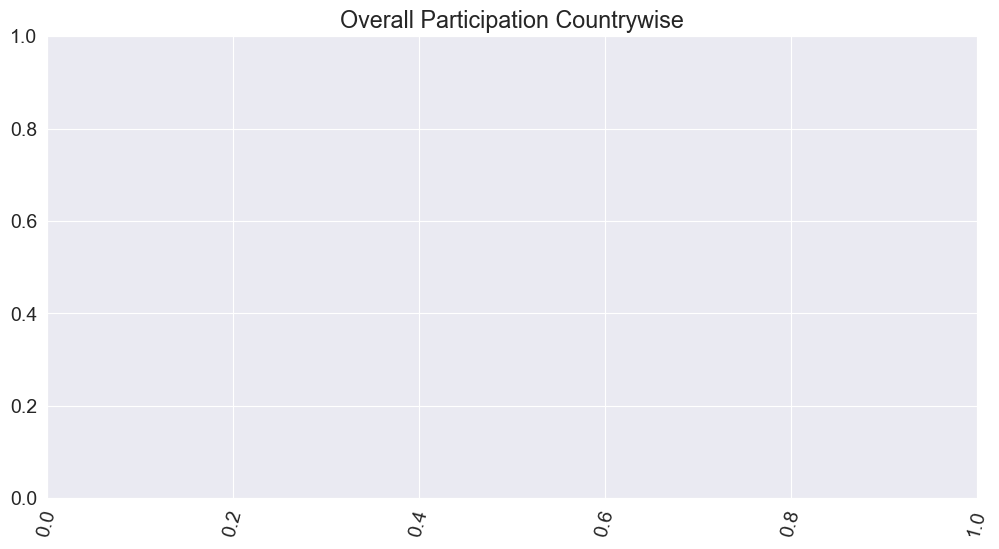

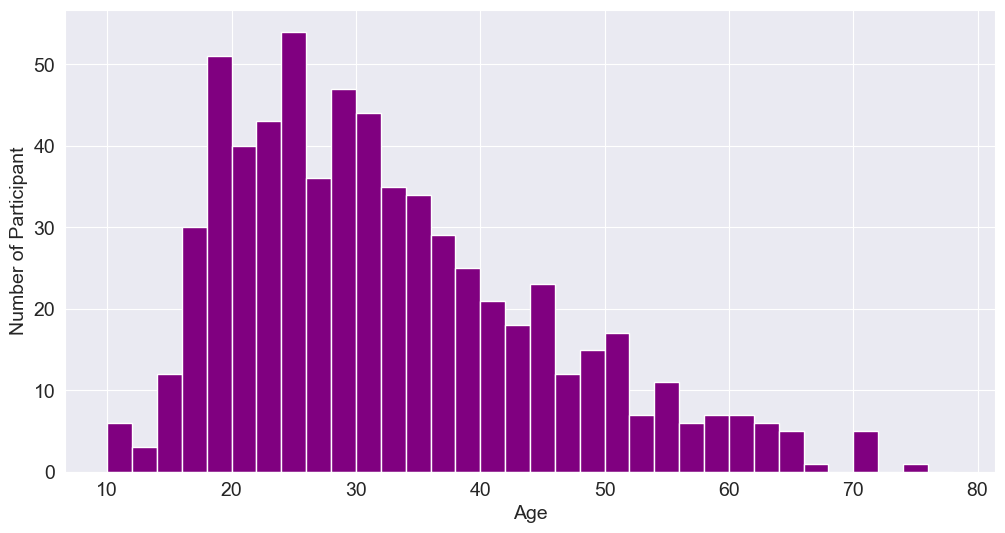

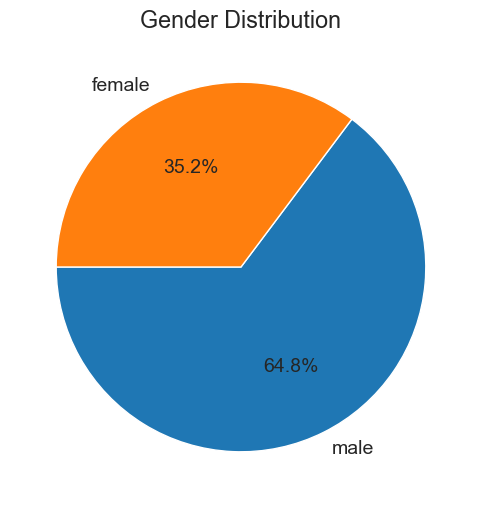

<Figure size 1200x600 with 0 Axes>

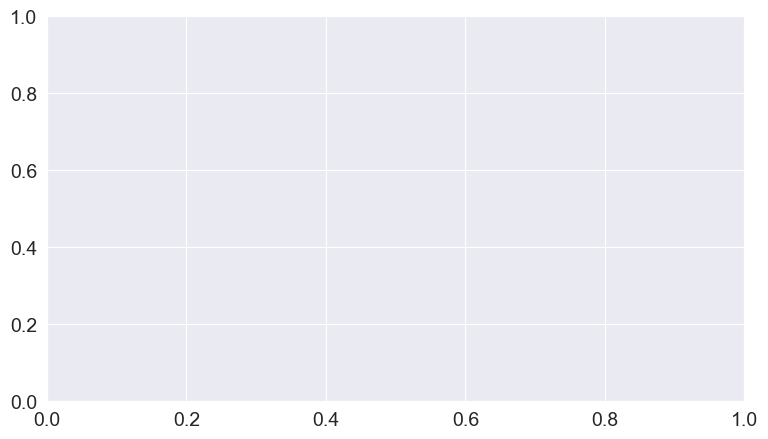

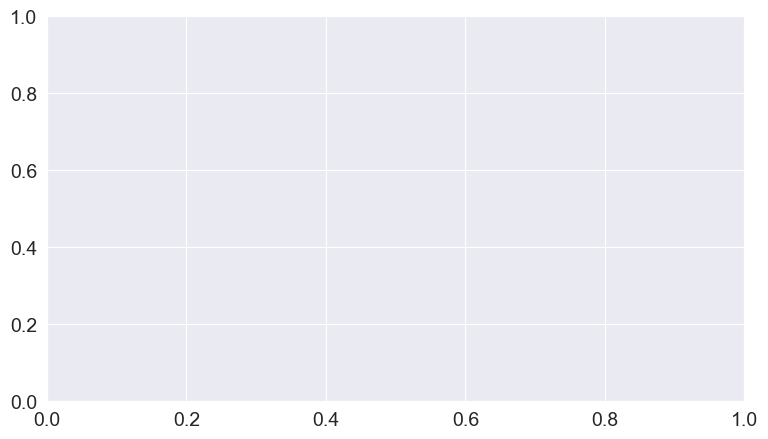

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

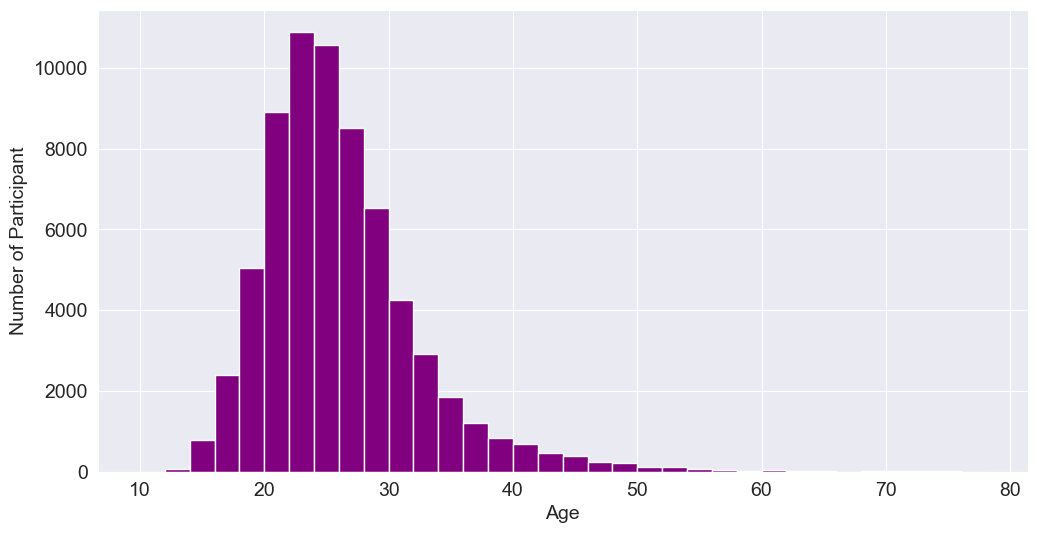

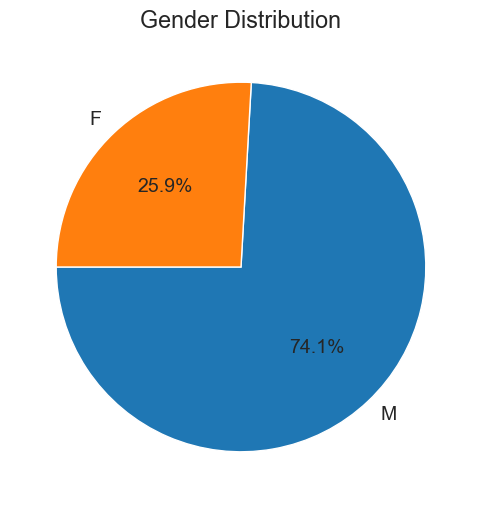

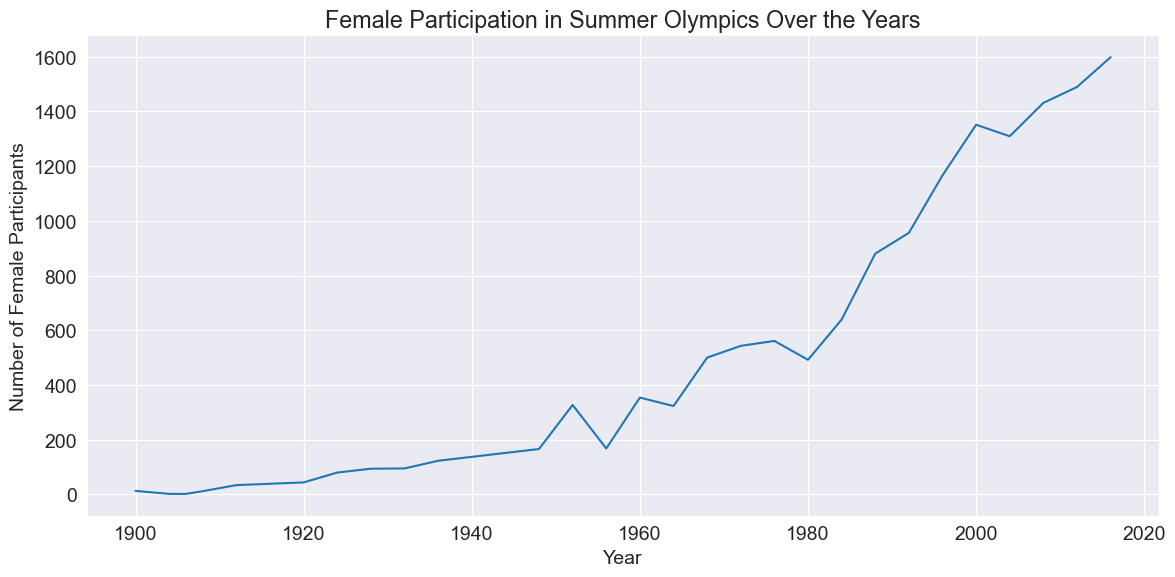

In [ ]:

df.columns = df.columns.str.strip()


required_cols = ['Sex', 'Season', 'Year']

if all(col in df.columns for col in required_cols):
   
   
    female_participants = df[(df['Sex'] == 'F') & (df['Season'] == 'Summer')][['Sex', 'Year']]
    
   
    female_participants = female_participants.groupby('Year').count().reset_index()

   
    sns.set_style('darkgrid')
    matplotlib.rcParams['font.size'] = 14
    matplotlib.rcParams['figure.figsize'] = (9, 5)


    plt.figure(figsize=(12, 6))
    sns.lineplot(data=female_participants, x="Year", y="Sex", err_style="bars", ci=68)
    plt.title("Female Participation in Summer Olympics Over the Years")
    plt.ylabel("Number of Female Participants")
    plt.xlabel("Year")
    plt.tight_layout()
    plt.show()
else:
    print("Missing one or more required columns:", required_cols)



In [42]:

df.columns = df.columns.str.strip()


print("Columns:", df.columns.tolist())


if 'Season' in df.columns:
    Diff_seasons = df['Season'].value_counts()
    print(Diff_seasons)
else:
    print("Column 'Season' not found.")


Columns: ['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games', 'Year', 'Season', 'City', 'Sport', 'Event', 'Medal']
Season
Summer    58467
Winter    11533
Name: count, dtype: int64


In [44]:
top_countries = df.Team.value_counts().sort_values(ascending=False).head(10)
top_countries


Team
United States    4979
France           4608
Italy            4023
Great Britain    3282
Canada           2536
Australia        2235
Sweden           2057
Germany          1965
Spain            1836
Switzerland      1560
Name: count, dtype: int64

In [46]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Overall Participation Countrywise')
sns.barplot(x=top_countries.index, y=top_countries);

In [48]:
import numpy as np
plt.figure(figsize=(12, 6))
# plt.title(df.Age)
plt.xlabel('Age')
plt.ylabel('Number of Participant')

plt.hist(df.Age, bins=np.arange(10,80,2), color='purple');

In [49]:
gender_counts = df.Sex.value_counts()
gender_counts

Sex
M    51877
F    18123
Name: count, dtype: int64

In [50]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=180);

In [51]:

female_participants = df[(df.Sex=='F') & (df.Season=='Summer')][['Sex','Year']]
female_participants = female_participants.groupby('Year').count().reset_index()
female_participants.head()


,Year,Sex
0,1900,13
1,1904,2
2,1906,2
3,1908,12
4,1912,34


C:\Users\user\AppData\Local\Temp\ipykernel_14300\696985794.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  sns.lineplot(data=female_participants_count, x="Year", y="Sex", err_style="bars", ci=68)


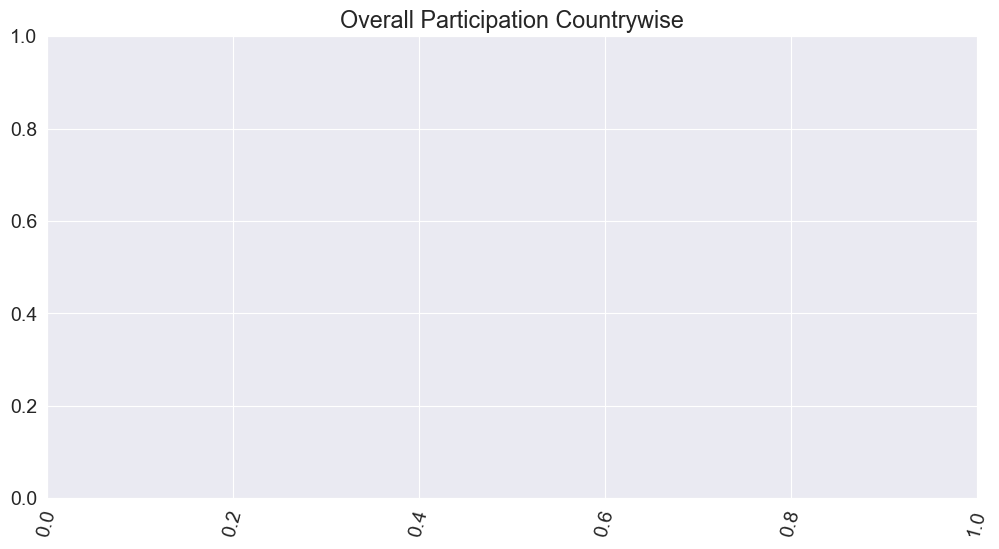

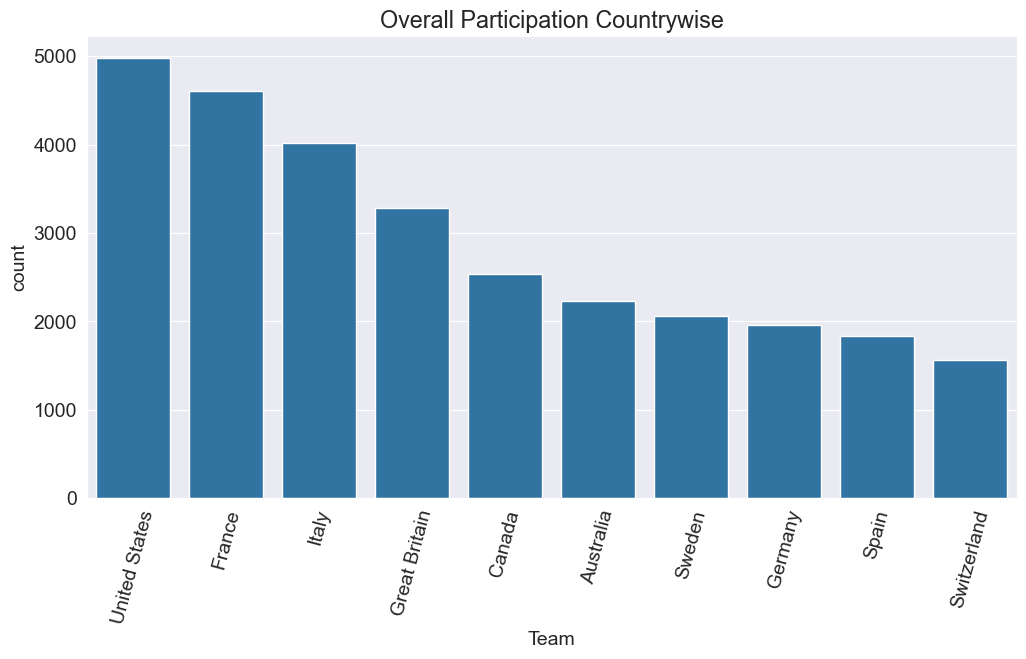

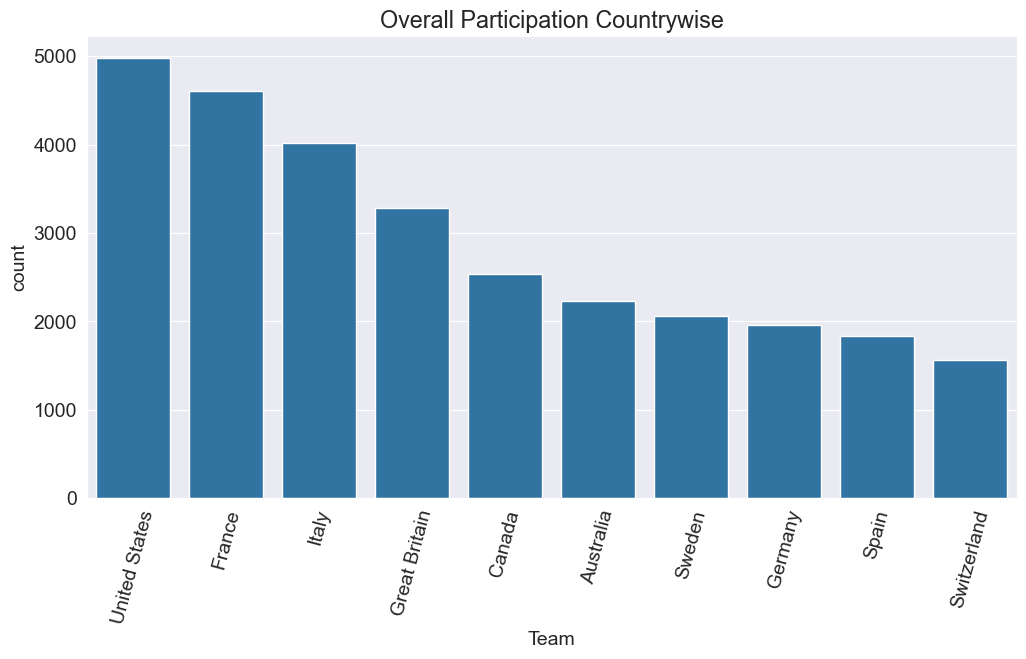

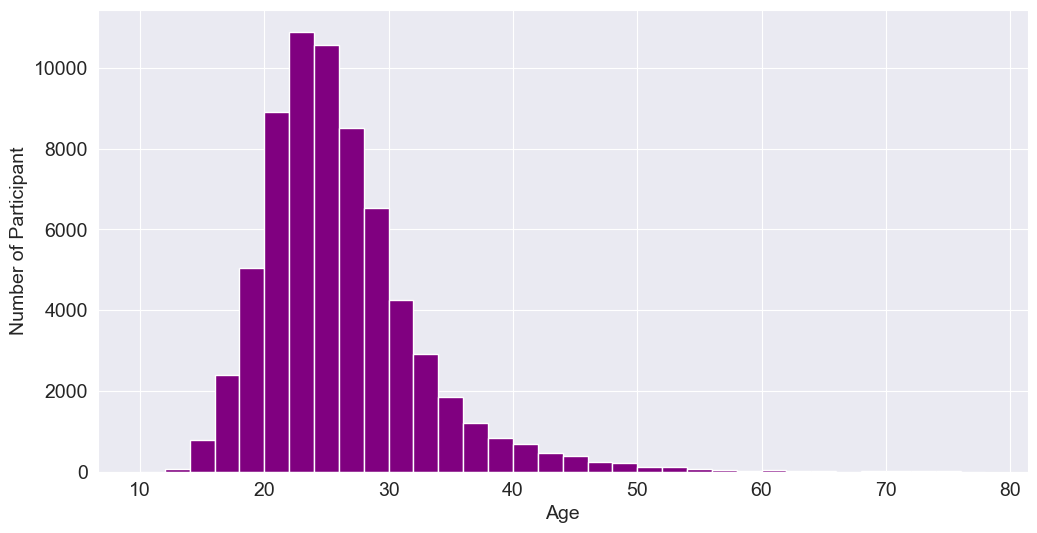

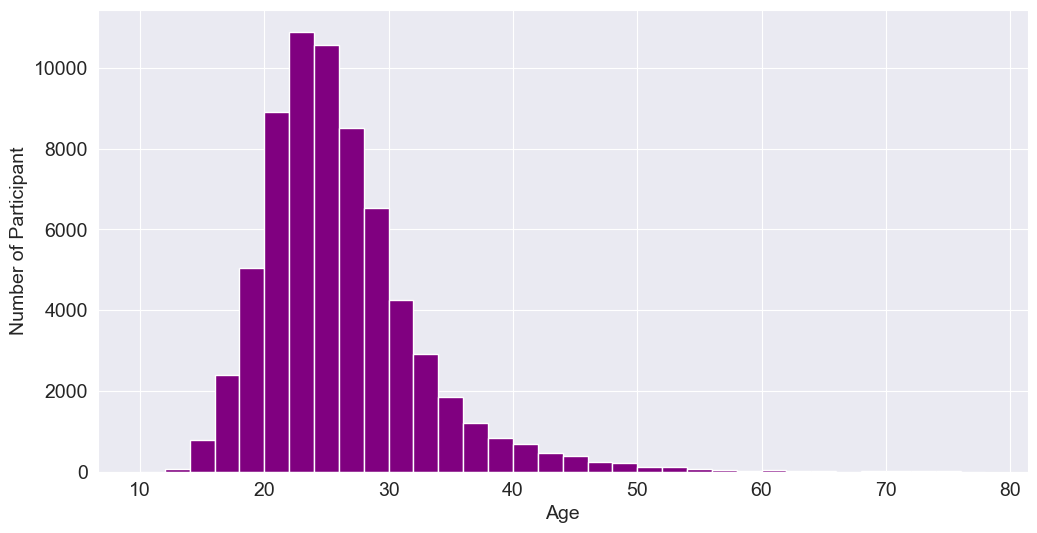

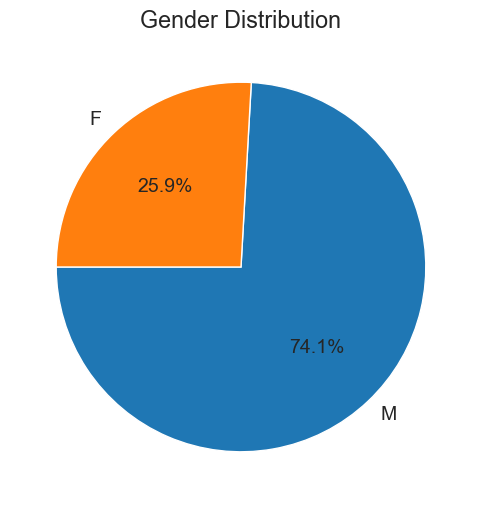

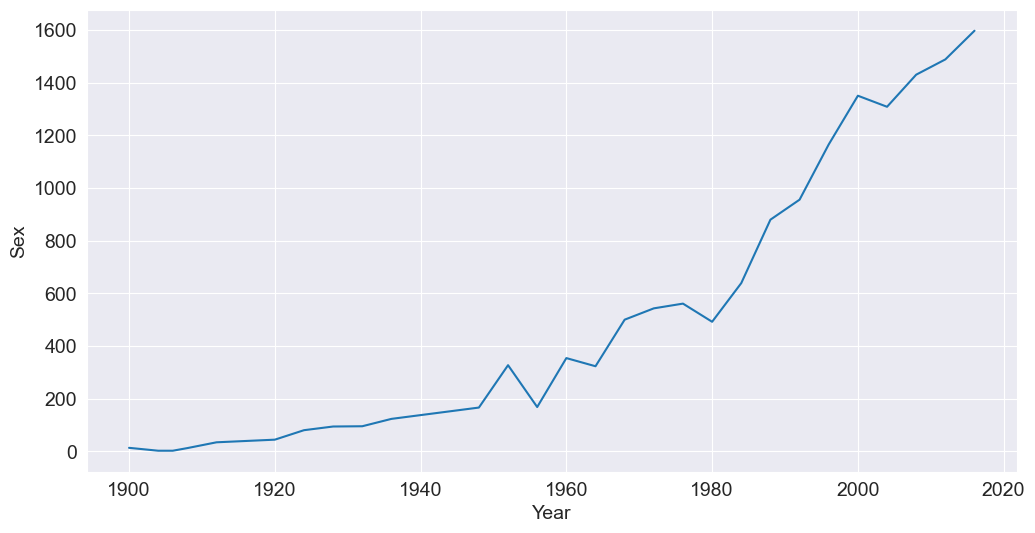

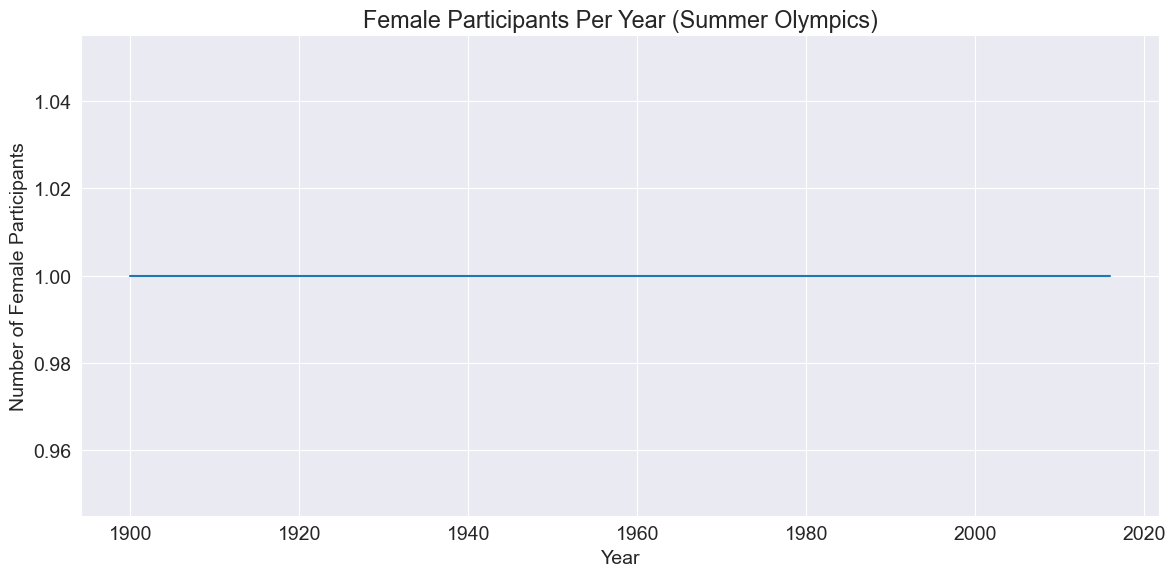

In [ ]:

female_participants_count = female_participants.groupby('Year').count().reset_index()


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 6)


plt.figure(figsize=(12, 6))
sns.lineplot(data=female_participants_count, x="Year", y="Sex", err_style="bars", ci=68)

plt.title("Female Participants Per Year (Summer Olympics)")
plt.xlabel("Year")
plt.ylabel("Number of Female Participants")
plt.tight_layout()
plt.show()


In [55]:

Diff_seasons = df.Season.value_counts()
Diff_seasons

Season
Summer    58467
Winter    11533
Name: count, dtype: int64

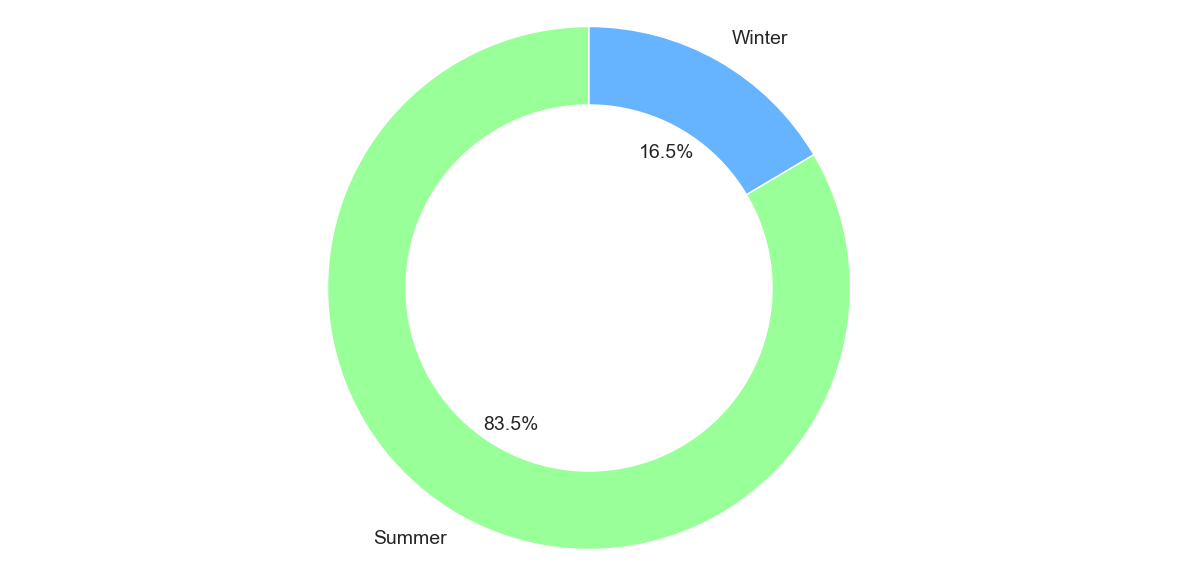

In [56]:
fig1, ax1 = plt.subplots()

colors = ['#99ff99','#66b3ff']

ax1.pie(Diff_seasons, colors = colors, labels=Diff_seasons.index, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [57]:
winter_olympic = df[df.Season=='Winter']
winter_sports = len(winter_olympic[['Sport']].drop_duplicates())
winter_events = len(winter_olympic[['Event']].drop_duplicates())
print(f'Sports Played: {winter_sports}, Events held: {winter_events}')

Sports Played: 17, Events held: 119


In [58]:
summer_olympic = df[df.Season=='Summer']
summer_sports = len(summer_olympic[['Sport']].drop_duplicates())
summer_events = len(summer_olympic[['Event']].drop_duplicates())
print(f'Sports Played: {summer_sports}, Events held: {summer_events}')

Sports Played: 51, Events held: 629


In [59]:

max_year = df.Year.max()

team_list = df[(df.Year == max_year) & (df.Medal=='Gold')].Team

team_list.value_counts().head(10)


Team
United States    49
Great Britain    18
Australia        12
Russia           11
China             9
Brazil            9
Germany           7
Jamaica           6
Spain             4
New Zealand       4
Name: count, dtype: int64

In [60]:
sns.barplot(x=team_list.value_counts().head(20), y=team_list.value_counts().head(20).index)

# plt.title(schema.UndergradMajor)
plt.ylabel(None);
plt.xlabel('Contrywise Medals for the year 2016');

In [61]:
US_Gold = df[(df.Year == max_year) & (df.Medal=='Gold') & (df.Team == 'United States')]
US_Gold = US_Gold[['Sport','Medal']].groupby('Sport').count()
US_Gold.reset_index(inplace=True)
Top_sports = US_Gold.sort_values('Medal', ascending=False)
Top_sports.head()

,Sport,Medal
5,Swimming,14
0,Athletics,11
1,Basketball,11
3,Gymnastics,5
6,Water Polo,5


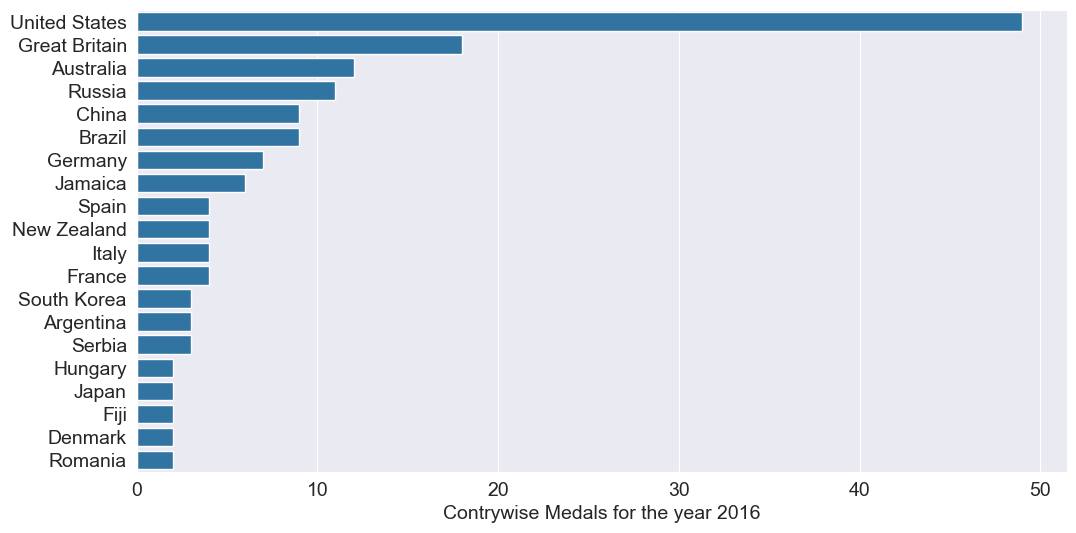

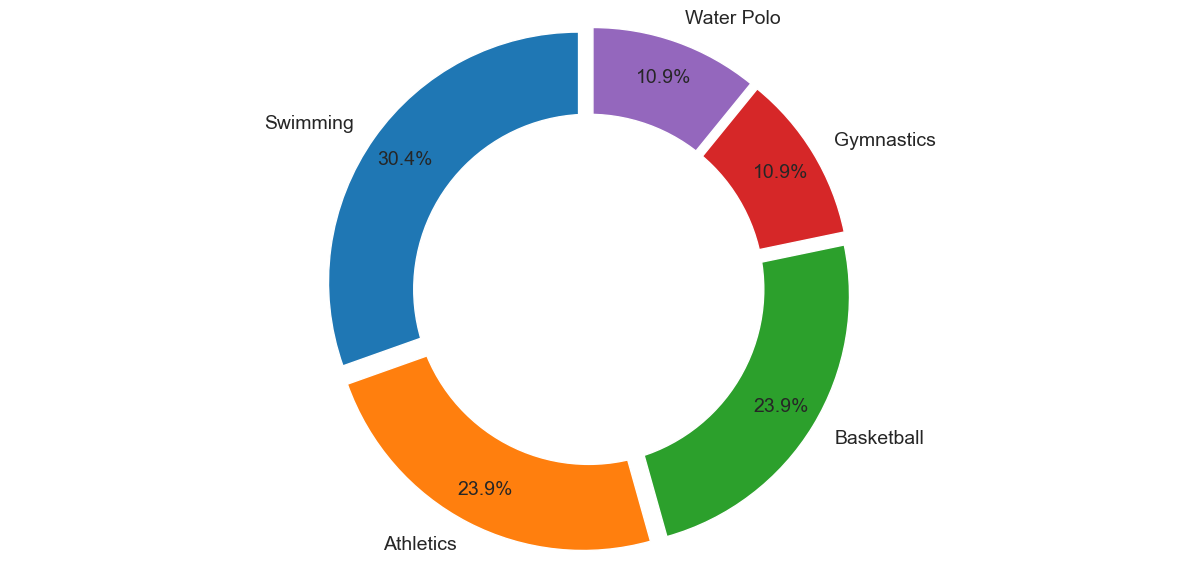

In [62]:
fig1, ax1 = plt.subplots()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

#explsion
explode = (0.05,0.05,0.05,0.05,0.05)

ax1.pie(Top_sports.head()['Medal'], colors = colors, labels= Top_sports.head()['Sport'], autopct='%1.1f%%', startangle=90
       , pctdistance=0.85, explode = explode)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.axis('equal')  
plt.tight_layout()
plt.show()


In [63]:
! pip install pandasql --upgrade --quiet
from pandasql import sqldf
output = sqldf('''
select Team, Year, max(Highest_Number_Of_Medals_per_Year) as 'Highest_Number_Of_Medals_per_Year' from (
select Team, Year, sum(Highest_Number_Of_Medals_per_Year) as 'Highest_Number_Of_Medals_per_Year' from (
select Name, Team, Medal, Year, count(*) as 'Highest_Number_Of_Medals_per_Year'
from df 
where 
Medal <>'None'
and
Season = 'Summer'
group by Year, Medal, Team, Name 
order by Year desc, Highest_Number_Of_Medals_per_Year)
group by Team, Year
order by Year, Highest_Number_Of_Medals_per_Year desc)
group by Year
order by Year desc
 ''')


In [64]:
output

,Team,Year,Highest_Number_Of_Medals_per_Year
0,United States,2016,85
1,United States,2012,63
2,United States,2008,72
3,United States,2004,63
4,United States,2000,56
5,United States,1996,67
6,United States,1992,69
7,United States,1988,66
8,United States,1984,103
9,Soviet Union,1980,107


In [70]:

df1 = df[(df.Age != 0) & (df.Height != 0.0) & (df.Medal!='None') & (df.Season =='Summer')]
sns.scatterplot(x=df1.Age, y=df1.Height, hue='Sex', data=df1)
plt.xlabel("Age")
plt.ylabel("Height");

In [69]:

Women_In_Olympics = df[(df.Sex == 'F') & (df.Medal != 'None') & (df.Season =='Summer')]

sns.set(style="darkgrid")
plt.figure(figsize=(20, 10))
sns.countplot(x='Year', data=Women_In_Olympics)
plt.title('Women medals per edition of the Games');


C:\Users\user\AppData\Local\Temp\ipykernel_14300\1159044115.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_medal_holders_above50, x='Sport', palette='viridis')


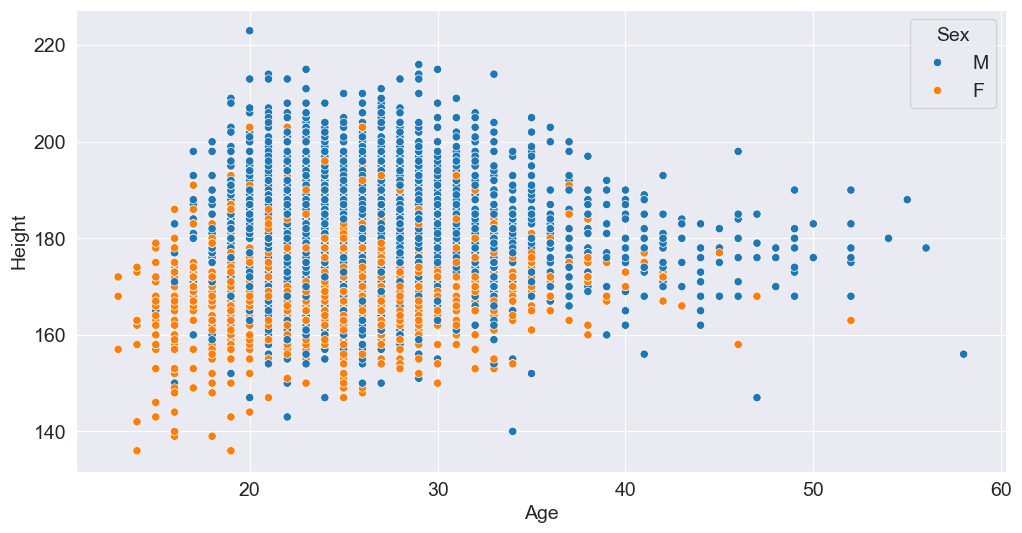

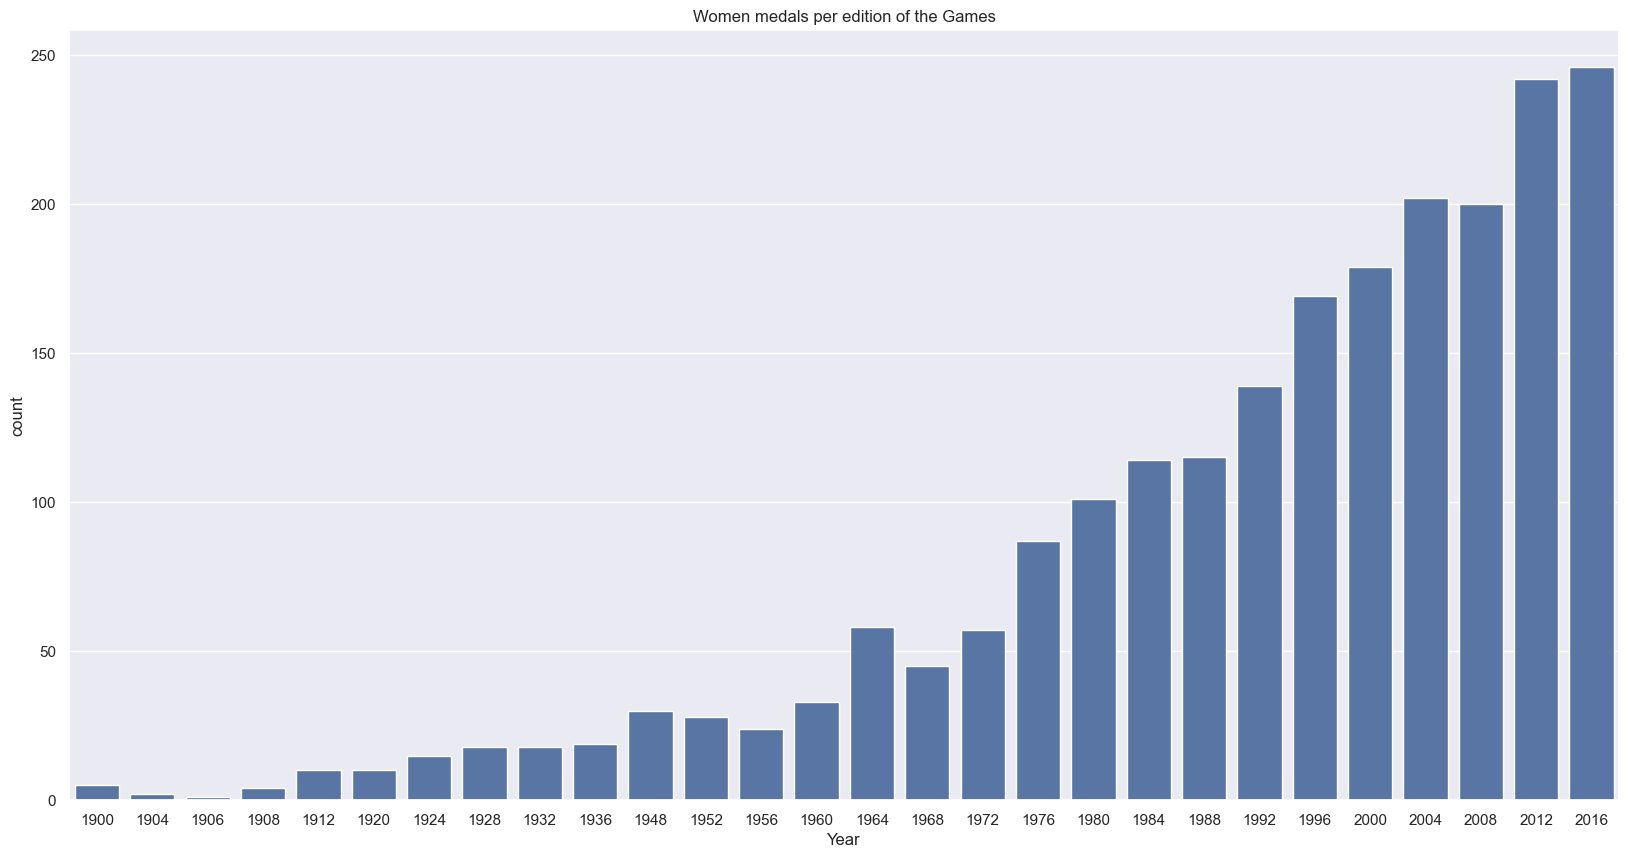

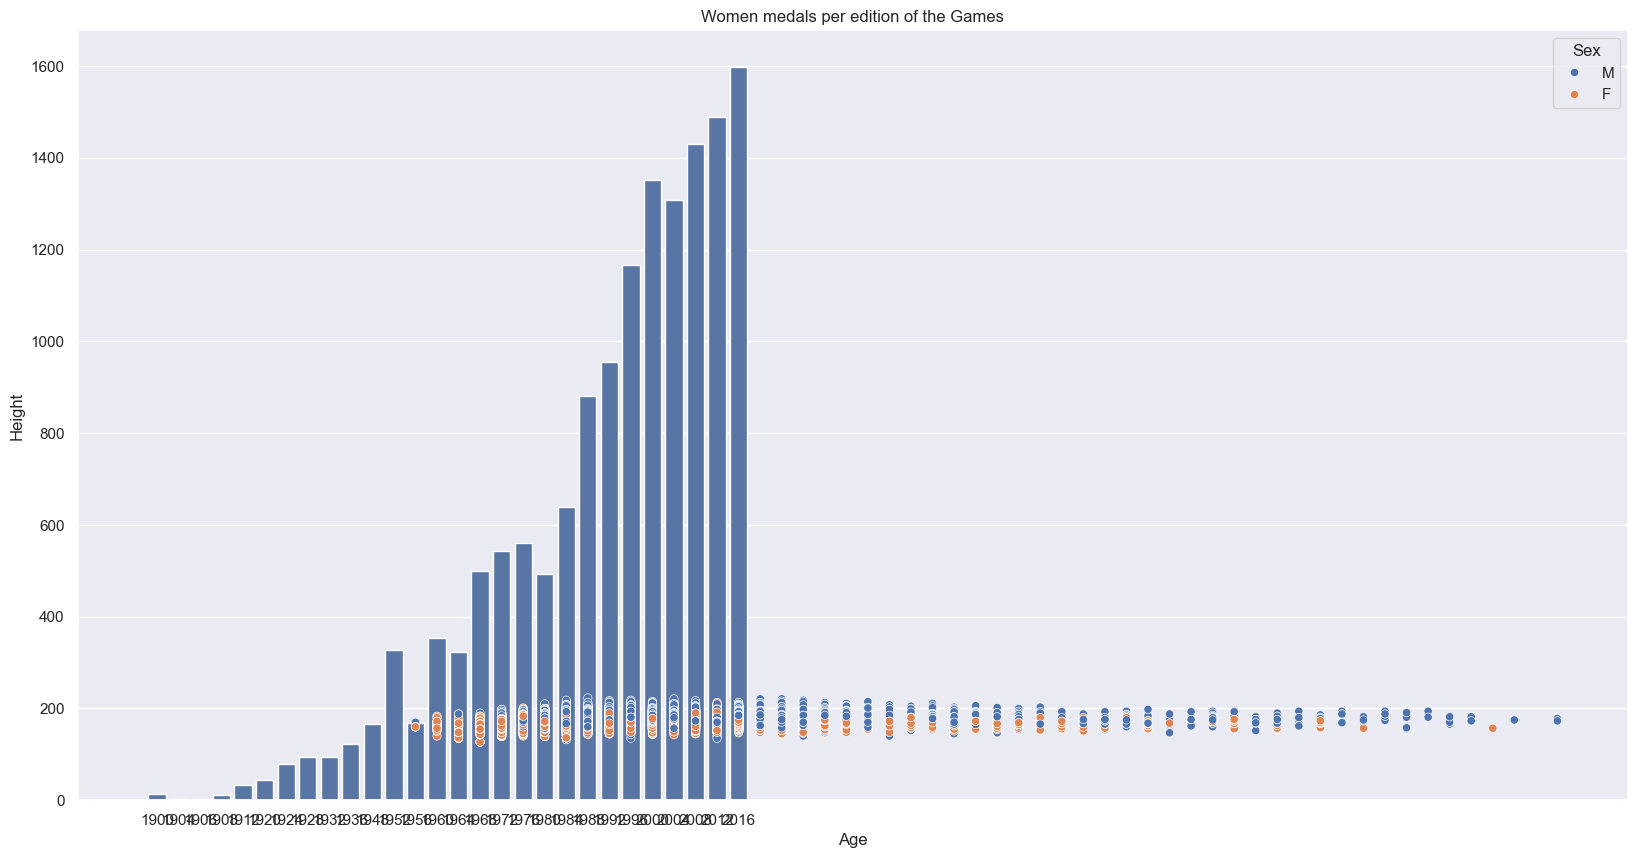

<Figure size 1200x600 with 0 Axes>

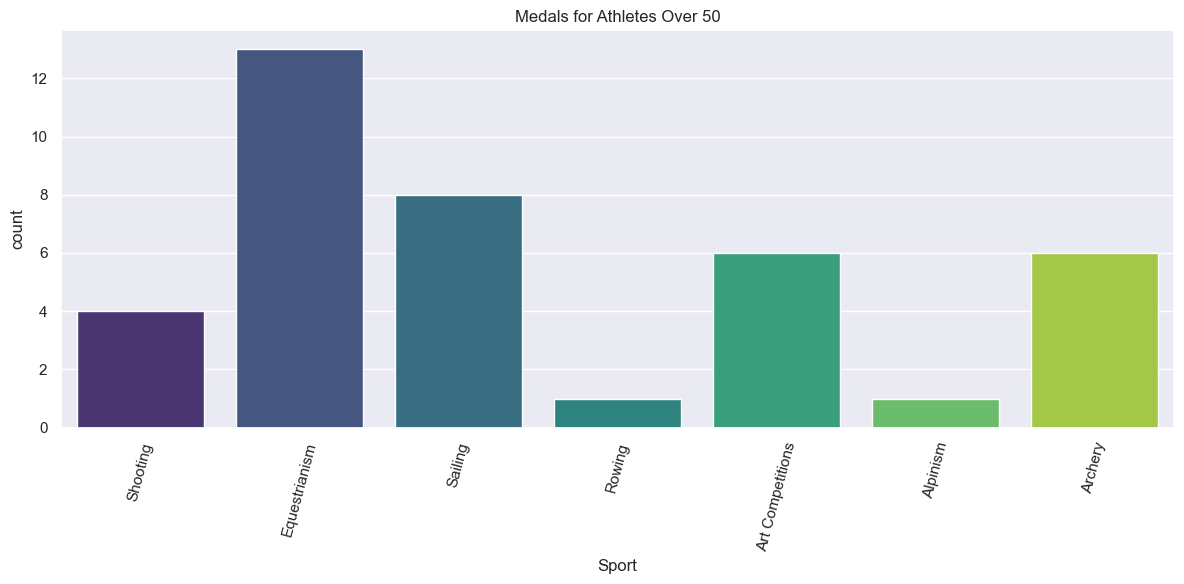

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_medal_holders_above50 = df[(df['Age'] > 50) & (df['Medal'].notna())]  


if 'Sport' in df_medal_holders_above50.columns:
  
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df_medal_holders_above50, x='Sport', palette='viridis')
    plt.title('Medals for Athletes Over 50')
    plt.xticks(rotation=75)
    plt.tight_layout()
    plt.show()
else:
    print("The 'Sport' column is missing in the filtered DataFrame.")



Inferences and Conclusions


1. US seems to dominants in terms of participation of maximum gold as well as overall participation in games.

2. Observed athletes from the age of 12 till the age of 58 years winning medals.

3. Summer Olympics have higher no of events and sports as compared to the winter Olympics.

4. In the history of 120 years of Olympics, Michael Fred Phelps, II has won maximum medals for his country i.e. 28 Medals

5. Seen a trend that woman participants across the years in in upward tread.

6. Participate with high weight (like > 150) seems to have done well in Wrestling, Weight lifting and Judo.